### PROJECT 2 : MUSTAFA

In [1]:
import os
import json
import pandas as pd
from tqdm import tqdm
from transformers import BertTokenizer,BertModel, pipeline, EncoderDecoderModel
from transformers import pipeline
import torch
import glob

C:\Users\Acer\Documents\anaconda3\envs\nlp_adv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. PERSIAPAN DATASET

DATA DEV

In [27]:
# Path ke folder yang berisi file JSON data DEV
folder_path = 'C:/Users/Acer/Documents/data_science/ai for indonesia/project 2/liputan6_data/liputan6_data/canonical/dev'

# Membaca semua file JSON dan menggabungkannya menjadi satu dataframe
data_list = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            data_list.append(data)

# Mengubah list of dictionaries menjadi dataframe
df_dev = pd.DataFrame(data_list)


In [29]:
df_dev

,id,url,clean_article,clean_summary,extractive_summary
0,1,https://www.liputan6.com/news/read/1/batas-pen...,"[[Liputan6, ., com, ,, Jakarta, :, Pemerintah,...","[[Pemerintah, memberikan, tenggat, 14, hari, k...","[1, 8]"
1,10,https://www.liputan6.com/news/read/10/belasan-...,"[[Liputan6, ., com, ,, Jakarta, :, Diperkiraka...","[[Satu, dari, 20, orang, Indonesia, diperkirak...","[2, 4]"
2,1000,https://www.liputan6.com/news/read/1000/lagi--...,"[[Liputan6, ., com, ,, Banda, Aceh, :, Aksi, p...","[[Peledakan, bom, kembali, terjadi, di, Aceh, ...","[2, 5]"
3,10000,https://www.liputan6.com/news/read/10000/penge...,"[[Liputan6, ., com, ,, Surabaya, :, Petugas, K...","[[Polres, Surabaya, Timur, menangkap, seorang,...","[0, 5]"
4,10001,https://www.liputan6.com/news/read/10001/menye...,"[[Liputan6, ., com, ,, Jakarta, :, Yogyakarta,...","[[Lima, seniman, Yogyakarta, dan, Bali, mengge...","[0, 2]"
...,...,...,...,...,...
10967,9995,https://www.liputan6.com/news/read/9995/penjar...,"[[Liputan6, ., com, ,, Palu, :, Sembilan, truk...","[[Pencurian, kayu, di, Palu, ,, Sulawesi, Teng...","[2, 5, 3]"
10968,9996,https://www.liputan6.com/news/read/9996/nelaya...,"[[Liputan6, ., com, ,, Lampung, Timur, :, Dua,...","[[Seorang, anggota, TNI, Angkatan, Laut, menem...","[0, 5]"
10969,9997,https://www.liputan6.com/news/read/9997/pemili...,"[[Liputan6, ., com, ,, Jakarta, :, Kepolisian,...","[[Indriadi, ,, warga, Kampung, Tarif, ,, Semar...","[0, 3]"
10970,9998,https://www.liputan6.com/news/read/9998/cina-m...,"[[Liputan6, ., com, ,, Jakarta, :, Pemerintah,...","[[Pemerintah, Cina, menjanjikan, akses, pasar,...","[6, 7]"


In [30]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
dtypes: int64(1), object(4)
memory usage: 428.7+ KB


In [31]:
# Fungsi untuk meratakan list dalam list
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(item)  # Jika item adalah list, extend ke flat_list
        else:
            flat_list.append(item)  # Jika bukan list, langsung append
    return flat_list

# Fungsi untuk konversi list menjadi string
def list_to_string(text):
    if isinstance(text, list):
        flat_text = flatten_list(text)  # Ratakan list
        return ' '.join(map(str, flat_text))  # Gabungkan menjadi string
    return text

# Terapkan ke kolom clean_article
df_dev['clean_article_str'] = df2['clean_article'].apply(list_to_string)
df_dev['clean_summary_str'] = df2['clean_summary'].apply(list_to_string)


# Hitung panjang teks setelah diratakan dan digabung
df_dev['text_length_article'] = df2['clean_article_str'].apply(lambda x: len(x.split()))
df_dev['text_length_summary'] = df2['clean_summary_str'].apply(lambda x: len(x.split()))

In [32]:
df_dev.head()

,id,url,clean_article,clean_summary,extractive_summary,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,1,https://www.liputan6.com/news/read/1/batas-pen...,"[[Liputan6, ., com, ,, Jakarta, :, Pemerintah,...","[[Pemerintah, memberikan, tenggat, 14, hari, k...","[1, 8]","Liputan6 . com , Jakarta : Pemerintah masih me...",Pemerintah memberikan tenggat 14 hari kepada p...,197,21
1,10,https://www.liputan6.com/news/read/10/belasan-...,"[[Liputan6, ., com, ,, Jakarta, :, Diperkiraka...","[[Satu, dari, 20, orang, Indonesia, diperkirak...","[2, 4]","Liputan6 . com , Jakarta : Diperkirakan 11 jut...",Satu dari 20 orang Indonesia diperkirakan meng...,166,22
2,1000,https://www.liputan6.com/news/read/1000/lagi--...,"[[Liputan6, ., com, ,, Banda, Aceh, :, Aksi, p...","[[Peledakan, bom, kembali, terjadi, di, Aceh, ...","[2, 5]","Liputan6 . com , Banda Aceh : Aksi peledakan k...",Peledakan bom kembali terjadi di Aceh . Kali i...,223,17
3,10000,https://www.liputan6.com/news/read/10000/penge...,"[[Liputan6, ., com, ,, Surabaya, :, Petugas, K...","[[Polres, Surabaya, Timur, menangkap, seorang,...","[0, 5]","Liputan6 . com , Surabaya : Petugas Kepolisian...",Polres Surabaya Timur menangkap seorang penged...,149,22
4,10001,https://www.liputan6.com/news/read/10001/menye...,"[[Liputan6, ., com, ,, Jakarta, :, Yogyakarta,...","[[Lima, seniman, Yogyakarta, dan, Bali, mengge...","[0, 2]","Liputan6 . com , Jakarta : Yogyakarta dan Bali...",Lima seniman Yogyakarta dan Bali menggelar pam...,148,25


In [33]:
df_dev = df_dev[['id', 'clean_article_str','clean_summary_str','text_length_article','text_length_summary']]

In [34]:
df_dev

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,1,"Liputan6 . com , Jakarta : Pemerintah masih me...",Pemerintah memberikan tenggat 14 hari kepada p...,197,21
1,10,"Liputan6 . com , Jakarta : Diperkirakan 11 jut...",Satu dari 20 orang Indonesia diperkirakan meng...,166,22
2,1000,"Liputan6 . com , Banda Aceh : Aksi peledakan k...",Peledakan bom kembali terjadi di Aceh . Kali i...,223,17
3,10000,"Liputan6 . com , Surabaya : Petugas Kepolisian...",Polres Surabaya Timur menangkap seorang penged...,149,22
4,10001,"Liputan6 . com , Jakarta : Yogyakarta dan Bali...",Lima seniman Yogyakarta dan Bali menggelar pam...,148,25
...,...,...,...,...,...
10967,9995,"Liputan6 . com , Palu : Sembilan truk yang mem...","Pencurian kayu di Palu , Sulawesi Tengah , sem...",119,31
10968,9996,"Liputan6 . com , Lampung Timur : Dua nelayan t...",Seorang anggota TNI Angkatan Laut menembaki ka...,212,28
10969,9997,"Liputan6 . com , Jakarta : Kepolisian Resor Ja...","Indriadi , warga Kampung Tarif , Semarang , Ja...",90,29
10970,9998,"Liputan6 . com , Jakarta : Pemerintah Cina men...",Pemerintah Cina menjanjikan akses pasar yang l...,235,23


In [37]:
df_dev.to_excel('datatext_dev.xlsx', index=False)

In [ ]:
DATA TRAIN

In [2]:
# Path ke folder yang berisi file JSON data DEV
folder_path = "C:/Users/Acer/Documents/data_science/ai for indonesia/project 2/liputan6_data/liputan6_data/canonical/train"

# Membaca semua file JSON dan menggabungkannya menjadi satu dataframe
data_list = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            data_list.append(data)

# Mengubah list of dictionaries menjadi dataframe
df_train = pd.DataFrame(data_list)


In [3]:
df_train.head()

,id,url,clean_article,clean_summary,extractive_summary
0,100000,https://www.liputan6.com/news/read/100000/yudh...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Menurut, Presiden, Susilo, Bambang, Yudhoyon...","[0, 1]"
1,100002,https://www.liputan6.com/news/read/100002/jepa...,"[[Liputan6, ., com, ,, Jakarta, :, Perdana, Me...","[[Pada, masa, silam, Jepang, terlalu, ambisius...","[2, 3]"
2,100003,https://www.liputan6.com/news/read/100003/pulu...,"[[Liputan6, ., com, ,, Kutai, :, Banjir, denga...","[[Puluhan, hektare, areal, persawahan, yang, s...","[1, 5]"
3,100004,https://www.liputan6.com/news/read/100004/pres...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Sekjen, PBB, Kofi, Annan, memuji, langkah, P...","[2, 5]"
4,100005,https://www.liputan6.com/news/read/100005/warg...,"[[Liputan6, ., com, ,, Solok, :, Warga, Kampun...","[[Untuk, mempercepat, pelaksanaan, belajar-men...","[0, 2]"


In [4]:
# Fungsi untuk meratakan list dalam list
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(item)  # Jika item adalah list, extend ke flat_list
        else:
            flat_list.append(item)  # Jika bukan list, langsung append
    return flat_list

# Fungsi untuk konversi list menjadi string
def list_to_string(text):
    if isinstance(text, list):
        flat_text = flatten_list(text)  # Ratakan list
        return ' '.join(map(str, flat_text))  # Gabungkan menjadi string
    return text

# Terapkan ke kolom clean_article
df_train['clean_article_str'] = df_train['clean_article'].apply(list_to_string)
df_train['clean_summary_str'] = df_train['clean_summary'].apply(list_to_string)


# Hitung panjang teks setelah diratakan dan digabung
df_train['text_length_article'] = df_train['clean_article_str'].apply(lambda x: len(x.split()))
df_train['text_length_summary'] = df_train['clean_summary_str'].apply(lambda x: len(x.split()))

In [5]:
df_train.head()

,id,url,clean_article,clean_summary,extractive_summary,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,100000,https://www.liputan6.com/news/read/100000/yudh...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Menurut, Presiden, Susilo, Bambang, Yudhoyon...","[0, 1]","Liputan6 . com , Jakarta : Presiden Susilo Bam...","Menurut Presiden Susilo Bambang Yudhoyono , ke...",333,29
1,100002,https://www.liputan6.com/news/read/100002/jepa...,"[[Liputan6, ., com, ,, Jakarta, :, Perdana, Me...","[[Pada, masa, silam, Jepang, terlalu, ambisius...","[2, 3]","Liputan6 . com , Jakarta : Perdana Menteri Jep...",Pada masa silam Jepang terlalu ambisius untuk ...,245,30
2,100003,https://www.liputan6.com/news/read/100003/pulu...,"[[Liputan6, ., com, ,, Kutai, :, Banjir, denga...","[[Puluhan, hektare, areal, persawahan, yang, s...","[1, 5]","Liputan6 . com , Kutai : Banjir dengan ketingg...",Puluhan hektare areal persawahan yang sebagian...,156,30
3,100004,https://www.liputan6.com/news/read/100004/pres...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Sekjen, PBB, Kofi, Annan, memuji, langkah, P...","[2, 5]","Liputan6 . com , Jakarta : Presiden Susilo Bam...",Sekjen PBB Kofi Annan memuji langkah Presiden ...,229,26
4,100005,https://www.liputan6.com/news/read/100005/warg...,"[[Liputan6, ., com, ,, Solok, :, Warga, Kampun...","[[Untuk, mempercepat, pelaksanaan, belajar-men...","[0, 2]","Liputan6 . com , Solok : Warga Kampung Batu Da...",Untuk mempercepat pelaksanaan belajar-mengajar...,184,29


In [6]:
df_train = df_train[['id', 'clean_article_str','clean_summary_str','text_length_article','text_length_summary']]
df_train.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,100000,"Liputan6 . com , Jakarta : Presiden Susilo Bam...","Menurut Presiden Susilo Bambang Yudhoyono , ke...",333,29
1,100002,"Liputan6 . com , Jakarta : Perdana Menteri Jep...",Pada masa silam Jepang terlalu ambisius untuk ...,245,30
2,100003,"Liputan6 . com , Kutai : Banjir dengan ketingg...",Puluhan hektare areal persawahan yang sebagian...,156,30
3,100004,"Liputan6 . com , Jakarta : Presiden Susilo Bam...",Sekjen PBB Kofi Annan memuji langkah Presiden ...,229,26
4,100005,"Liputan6 . com , Solok : Warga Kampung Batu Da...",Untuk mempercepat pelaksanaan belajar-mengajar...,184,29


In [7]:
df_train.to_excel('datatext_train.xlsx', index=False)

In [ ]:
DATA TEST

In [8]:
# Path ke folder yang berisi file JSON data DEV
folder_path = "C:/Users/Acer/Documents/data_science/ai for indonesia/project 2/liputan6_data/liputan6_data/canonical/test"

# Membaca semua file JSON dan menggabungkannya menjadi satu dataframe
data_list = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            data_list.append(data)

# Mengubah list of dictionaries menjadi dataframe
df_test = pd.DataFrame(data_list)

In [9]:
df_test.head()

,id,url,clean_article,clean_summary,extractive_summary
0,13019,https://www.liputan6.com/news/read/13019/kapol...,"[[Liputan6, ., com, ,, Jakarta, :, Kepolisian,...","[[Kapolda, Riau, baru, Brigjen, Pol, .], [John...","[0, 4, 9]"
1,13020,https://www.liputan6.com/news/read/13020/bi-di...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Kendati, Bank, Sentral, AS, menurunkan, suku...","[0, 4]"
2,13022,https://www.liputan6.com/news/read/13022/pemer...,"[[Liputan6, ., com, ,, Jakarta, :, Berbagai, k...","[[Pemerintah, bermaksud, akan, lebih, menganda...","[0, 7]"
3,13024,https://www.liputan6.com/news/read/13024/perub...,"[[Liputan6, ., com, ,, Jakarta, :, Penghapusan...","[[Revisi, Kepmennaker, Nomor, 78, Tahun, 2001,...","[0, 8]"
4,13025,https://www.liputan6.com/news/read/13025/puluh...,"[[Liputan6, ., com, ,, Jakarta, :, Operasi, Sa...","[[Polisi, menangkap, 32, pengunjung, Diskotik,...","[2, 3]"


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
dtypes: int64(1), object(4)
memory usage: 428.7+ KB


In [11]:
# Fungsi untuk meratakan list dalam list
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(item)  # Jika item adalah list, extend ke flat_list
        else:
            flat_list.append(item)  # Jika bukan list, langsung append
    return flat_list

# Fungsi untuk konversi list menjadi string
def list_to_string(text):
    if isinstance(text, list):
        flat_text = flatten_list(text)  # Ratakan list
        return ' '.join(map(str, flat_text))  # Gabungkan menjadi string
    return text

# Terapkan ke kolom clean_article
df_test['clean_article_str'] = df_test['clean_article'].apply(list_to_string)
df_test['clean_summary_str'] = df_test['clean_summary'].apply(list_to_string)


# Hitung panjang teks setelah diratakan dan digabung
df_test['text_length_article'] = df_test['clean_article_str'].apply(lambda x: len(x.split()))
df_test['text_length_summary'] = df_test['clean_summary_str'].apply(lambda x: len(x.split()))

In [12]:
df_test.head()

,id,url,clean_article,clean_summary,extractive_summary,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,13019,https://www.liputan6.com/news/read/13019/kapol...,"[[Liputan6, ., com, ,, Jakarta, :, Kepolisian,...","[[Kapolda, Riau, baru, Brigjen, Pol, .], [John...","[0, 4, 9]","Liputan6 . com , Jakarta : Kepolisian Daerah R...",Kapolda Riau baru Brigjen Pol . Johny Yodjana ...,191,26
1,13020,https://www.liputan6.com/news/read/13020/bi-di...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Kendati, Bank, Sentral, AS, menurunkan, suku...","[0, 4]","Liputan6 . com , Jakarta : Bank Indonesia dini...",Kendati Bank Sentral AS menurunkan suku bungan...,192,28
2,13022,https://www.liputan6.com/news/read/13022/pemer...,"[[Liputan6, ., com, ,, Jakarta, :, Berbagai, k...","[[Pemerintah, bermaksud, akan, lebih, menganda...","[0, 7]","Liputan6 . com , Jakarta : Berbagai kendala me...",Pemerintah bermaksud akan lebih mengandalkan s...,161,28
3,13024,https://www.liputan6.com/news/read/13024/perub...,"[[Liputan6, ., com, ,, Jakarta, :, Penghapusan...","[[Revisi, Kepmennaker, Nomor, 78, Tahun, 2001,...","[0, 8]","Liputan6 . com , Jakarta : Penghapusan beberap...","Revisi Kepmennaker Nomor 78 Tahun 2001 , dinil...",224,24
4,13025,https://www.liputan6.com/news/read/13025/puluh...,"[[Liputan6, ., com, ,, Jakarta, :, Operasi, Sa...","[[Polisi, menangkap, 32, pengunjung, Diskotik,...","[2, 3]","Liputan6 . com , Jakarta : Operasi Sadar Jaya ...",Polisi menangkap 32 pengunjung Diskotik Mileni...,141,30


In [13]:
df_test = df_test[['id', 'clean_article_str','clean_summary_str','text_length_article','text_length_summary']]
df_test.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,13019,"Liputan6 . com , Jakarta : Kepolisian Daerah R...",Kapolda Riau baru Brigjen Pol . Johny Yodjana ...,191,26
1,13020,"Liputan6 . com , Jakarta : Bank Indonesia dini...",Kendati Bank Sentral AS menurunkan suku bungan...,192,28
2,13022,"Liputan6 . com , Jakarta : Berbagai kendala me...",Pemerintah bermaksud akan lebih mengandalkan s...,161,28
3,13024,"Liputan6 . com , Jakarta : Penghapusan beberap...","Revisi Kepmennaker Nomor 78 Tahun 2001 , dinil...",224,24
4,13025,"Liputan6 . com , Jakarta : Operasi Sadar Jaya ...",Polisi menangkap 32 pengunjung Diskotik Mileni...,141,30


In [14]:
df_test.to_excel('datatext_test.xlsx', index=False)

In [3]:
df_dev = pd.read_excel('datatext_dev.xlsx')
df_dev

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,1,"Liputan6 . com , Jakarta : Pemerintah masih me...",Pemerintah memberikan tenggat 14 hari kepada p...,197,21
1,10,"Liputan6 . com , Jakarta : Diperkirakan 11 jut...",Satu dari 20 orang Indonesia diperkirakan meng...,166,22
2,1000,"Liputan6 . com , Banda Aceh : Aksi peledakan k...",Peledakan bom kembali terjadi di Aceh . Kali i...,223,17
3,10000,"Liputan6 . com , Surabaya : Petugas Kepolisian...",Polres Surabaya Timur menangkap seorang penged...,149,22
4,10001,"Liputan6 . com , Jakarta : Yogyakarta dan Bali...",Lima seniman Yogyakarta dan Bali menggelar pam...,148,25
...,...,...,...,...,...
10967,9995,"Liputan6 . com , Palu : Sembilan truk yang mem...","Pencurian kayu di Palu , Sulawesi Tengah , sem...",119,31
10968,9996,"Liputan6 . com , Lampung Timur : Dua nelayan t...",Seorang anggota TNI Angkatan Laut menembaki ka...,212,28
10969,9997,"Liputan6 . com , Jakarta : Kepolisian Resor Ja...","Indriadi , warga Kampung Tarif , Semarang , Ja...",90,29
10970,9998,"Liputan6 . com , Jakarta : Pemerintah Cina men...",Pemerintah Cina menjanjikan akses pasar yang l...,235,23


In [4]:
df_train = pd.read_excel('datatext_train.xlsx')
df_train

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,100000,"Liputan6 . com , Jakarta : Presiden Susilo Bam...","Menurut Presiden Susilo Bambang Yudhoyono , ke...",333,29
1,100002,"Liputan6 . com , Jakarta : Perdana Menteri Jep...",Pada masa silam Jepang terlalu ambisius untuk ...,245,30
2,100003,"Liputan6 . com , Kutai : Banjir dengan ketingg...",Puluhan hektare areal persawahan yang sebagian...,156,30
3,100004,"Liputan6 . com , Jakarta : Presiden Susilo Bam...",Sekjen PBB Kofi Annan memuji langkah Presiden ...,229,26
4,100005,"Liputan6 . com , Solok : Warga Kampung Batu Da...",Untuk mempercepat pelaksanaan belajar-mengajar...,184,29
...,...,...,...,...,...
193878,99995,"Liputan6 . com , Kutai : Banjir yang terjadi s...",Sebanyak 25 kecamatan di Kutai Barat dan Kutai...,141,30
193879,99996,"Liputan6 . com , Kabupaten Gowa : Lima desa di...",Ribuan kubik lumpur dari Gunung Bawakaraeng ya...,224,27
193880,99997,"Liputan6 . com , Nias : Sejumlah desa di kawas...","Kawasan paling utara di Pulau Nias , Lahewa , ...",188,34
193881,99998,"Liputan6 . com , Bogor : Kebakaran di rumah wa...","Dari bukti-bukti di lapangan , kebakaran rumah...",170,36


In [5]:
df_test = pd.read_excel('datatext_test.xlsx')
df_test

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary
0,13019,"Liputan6 . com , Jakarta : Kepolisian Daerah R...",Kapolda Riau baru Brigjen Pol . Johny Yodjana ...,191,26
1,13020,"Liputan6 . com , Jakarta : Bank Indonesia dini...",Kendati Bank Sentral AS menurunkan suku bungan...,192,28
2,13022,"Liputan6 . com , Jakarta : Berbagai kendala me...",Pemerintah bermaksud akan lebih mengandalkan s...,161,28
3,13024,"Liputan6 . com , Jakarta : Penghapusan beberap...","Revisi Kepmennaker Nomor 78 Tahun 2001 , dinil...",224,24
4,13025,"Liputan6 . com , Jakarta : Operasi Sadar Jaya ...",Polisi menangkap 32 pengunjung Diskotik Mileni...,141,30
...,...,...,...,...,...
10967,26400,"Liputan6 . com , Jakarta : Kejaksaan Agung , h...",Kejagung masih menunggu putusan hakim PN Jakse...,172,27
10968,26401,"Liputan6 . com , Jakarta : Dewan Pimpinan Pusa...",Ketua DPP PKB Khofifah Indarparawansa menuduh ...,186,26
10969,26402,"Liputan6 . com , Jakarta : Warga Kampung Melay...","Menyambut Tahun Baru 2002 , warga Kampung Mela...",150,25
10970,26403,"Liputan6 . com , Jakarta : Romadhani alias Rob...",Romadhani alias Roban tewas ditembak polisi sa...,109,26


In [18]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10972 non-null  int64 
 1   clean_article_str    10972 non-null  object
 2   clean_summary_str    10972 non-null  object
 3   text_length_article  10972 non-null  int64 
 4   text_length_summary  10972 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 428.7+ KB


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   193883 non-null  int64 
 1   clean_article_str    193883 non-null  object
 2   clean_summary_str    193883 non-null  object
 3   text_length_article  193883 non-null  int64 
 4   text_length_summary  193883 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10972 non-null  int64 
 1   clean_article_str    10972 non-null  object
 2   clean_summary_str    10972 non-null  object
 3   text_length_article  10972 non-null  int64 
 4   text_length_summary  10972 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 428.7+ KB


## 2. DATA UNDERSTANDING

### 2.1 Melihat distribusi dataset berdasarkan panjang artikel

In [6]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10972 non-null  int64 
 1   clean_article_str    10972 non-null  object
 2   clean_summary_str    10972 non-null  object
 3   text_length_article  10972 non-null  int64 
 4   text_length_summary  10972 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 428.7+ KB


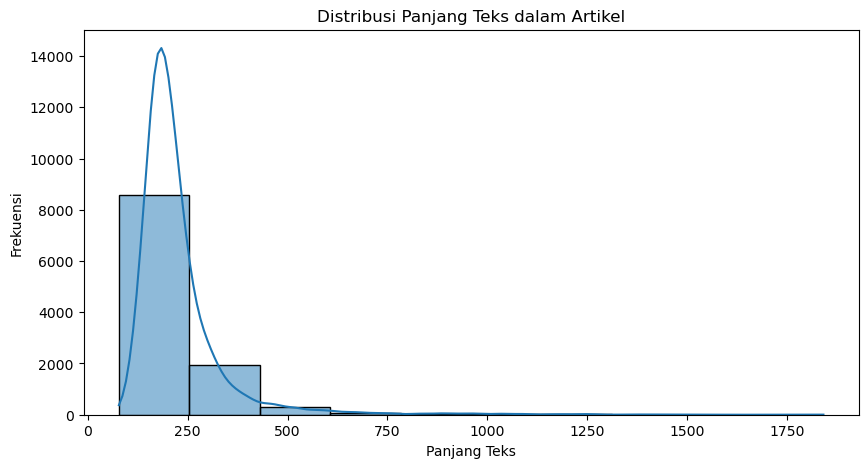

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_dev['text_length_article'], bins=10, kde=True)
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks dalam Artikel')
plt.show()

In [10]:
df_dev.describe()

,id,text_length_article,text_length_summary
count,10972.000000,10972.000000,10972.000000
mean,6546.073460,226.761757,24.805596
std,3713.415805,118.478675,3.918623
min,1.000000,78.000000,12.000000
25%,3358.750000,168.000000,22.000000
50%,6514.500000,199.000000,25.000000
75%,9744.500000,245.000000,27.000000
max,13018.000000,1841.000000,42.000000


In [ ]:
# INSIGHT 
+ Panjang dataset rata-rata 226 kata, minimal 78 kata dan paling panjang 1841 kata.
+ 

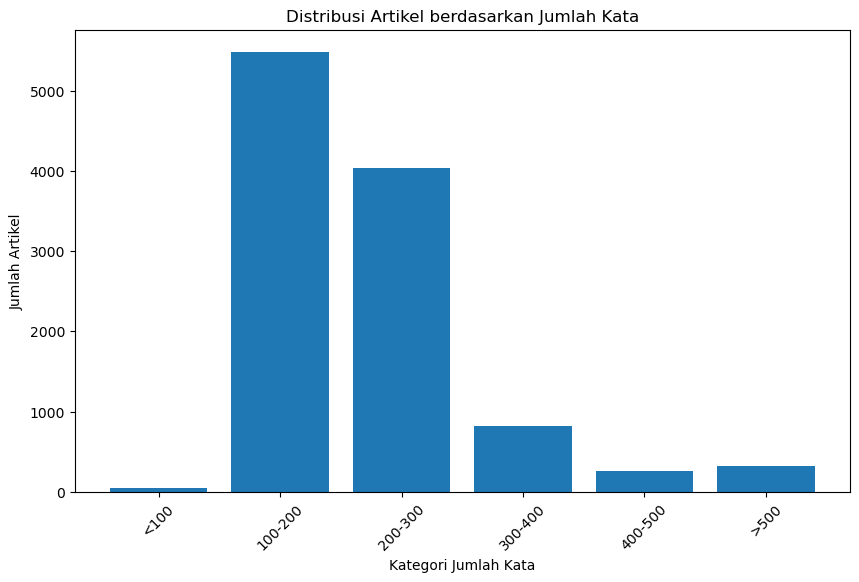

In [14]:
# melihat distribusi dataset berdasarkan jumlah kata
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah kata di setiap artikel
df_dev["word_count"] = df_dev["clean_article_str"].apply(lambda x: len(x.split()))

# Kategorisasi berdasarkan jumlah kata
bins = [0, 100, 200, 300, 400, 500, float("inf")]
labels = ["<100", "100-200", "200-300", "300-400", "400-500", ">500"]
df_dev["category"] = pd.cut(df_dev["word_count"], bins=bins, labels=labels, right=False)

# Menghitung jumlah artikel di setiap kategori
category_counts = df_dev["category"].value_counts().sort_index()

# Visualisasi dalam bentuk grafik batang
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Kategori Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.title("Distribusi Artikel berdasarkan Jumlah Kata")
plt.xticks(rotation=45)
plt.show()

#### INSIGHT 
+ untuk menghasilkan text summarisasi, kita hilangkan baris dengan kata dibawah 100 dan diatas 500, dengan pertimbangan untuk efektifitas proses summarisasi

C:\Users\Acer\AppData\Local\Temp\ipykernel_22240\3128178767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["category"] = pd.cut(df_dev["word_count"], bins=bins, labels=labels, right=False)


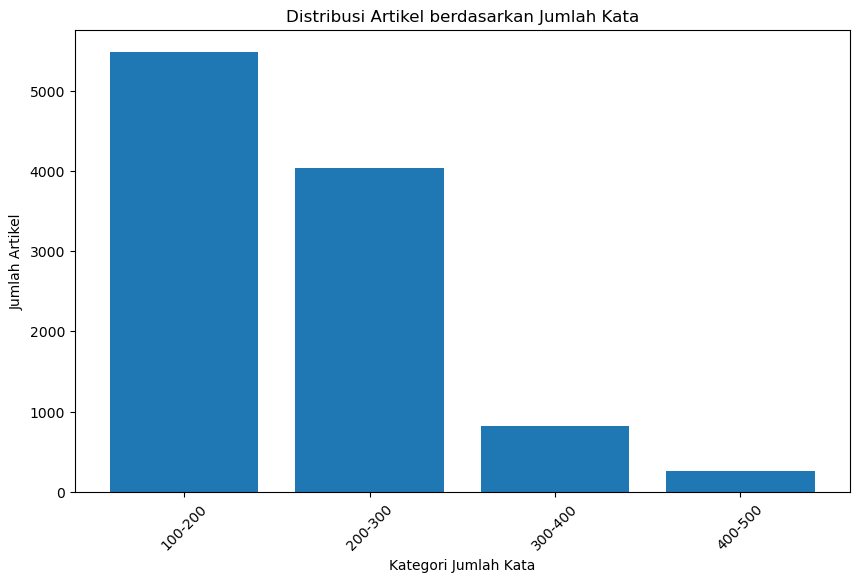

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah kata di setiap artikel
df_dev["word_count"] = df_dev["clean_article_str"].apply(lambda x: len(x.split()))

# Menghapus baris dengan jumlah kata di bawah 100 dan di atas 500
df_dev = df_dev[(df_dev["word_count"] >= 100) & (df_dev["word_count"] <= 500)]

# Kategorisasi berdasarkan jumlah kata
bins = [100, 200, 300, 400, 500]
labels = ["100-200", "200-300", "300-400", "400-500"]
df_dev["category"] = pd.cut(df_dev["word_count"], bins=bins, labels=labels, right=False)

# Menghitung jumlah artikel di setiap kategori
category_counts = df_dev["category"].value_counts().sort_index()

# Visualisasi dalam bentuk grafik batang
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Kategori Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.title("Distribusi Artikel berdasarkan Jumlah Kata")
plt.xticks(rotation=45)
plt.show()


In [17]:
df_dev.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary,word_count,category
0,1,"Liputan6 . com , Jakarta : Pemerintah masih me...",Pemerintah memberikan tenggat 14 hari kepada p...,197,21,197,100-200
1,10,"Liputan6 . com , Jakarta : Diperkirakan 11 jut...",Satu dari 20 orang Indonesia diperkirakan meng...,166,22,166,100-200
2,1000,"Liputan6 . com , Banda Aceh : Aksi peledakan k...",Peledakan bom kembali terjadi di Aceh . Kali i...,223,17,223,200-300
3,10000,"Liputan6 . com , Surabaya : Petugas Kepolisian...",Polres Surabaya Timur menangkap seorang penged...,149,22,149,100-200
4,10001,"Liputan6 . com , Jakarta : Yogyakarta dan Bali...",Lima seniman Yogyakarta dan Bali menggelar pam...,148,25,148,100-200


In [19]:
# 2. Menghapus judul artikel
import pandas as pd
import re

# Fungsi untuk membersihkan judul artikel
def clean_article(text):
    return re.sub(r'Liputan6\s\.\scom\s,\s[\w\s]+:', '', text).strip()

# Terapkan fungsi pada kolom clean_article_str
df_dev["clean_article_str"] = df_dev["clean_article_str"].apply(clean_article)


C:\Users\Acer\AppData\Local\Temp\ipykernel_22240\932051538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["clean_article_str"] = df_dev["clean_article_str"].apply(clean_article)


In [20]:
df_dev.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary,word_count,category
0,1,Pemerintah masih memberikan waktu dua minggu l...,Pemerintah memberikan tenggat 14 hari kepada p...,197,21,197,100-200
1,10,Diperkirakan 11 juta penduduk Indonesia positi...,Satu dari 20 orang Indonesia diperkirakan meng...,166,22,166,100-200
2,1000,Aksi peledakan kantor pemerintah di Aceh terny...,Peledakan bom kembali terjadi di Aceh . Kali i...,223,17,223,200-300
3,10000,Petugas Kepolisian Resor Surabaya Timur menemb...,Polres Surabaya Timur menangkap seorang penged...,149,22,149,100-200
4,10001,Yogyakarta dan Bali memang gudangnya para seni...,Lima seniman Yogyakarta dan Bali menggelar pam...,148,25,148,100-200


In [21]:
import pandas as pd
import re
from bs4 import BeautifulSoup


# Fungsi untuk membersihkan teks
def clean_text(text):
    # Mengubah menjadi huruf kecil
    text = text.lower()
    
    # Menghapus tag HTML jika ada
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Menghapus karakter khusus (kecuali huruf, angka, dan spasi)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Menghapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Terapkan fungsi clean_text ke kolom teks
df_dev["clean_article_str"] = df_dev["clean_article_str"].apply(clean_text)



C:\Users\Acer\AppData\Local\Temp\ipykernel_22240\1722068087.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["clean_article_str"] = df_dev["clean_article_str"].apply(clean_text)


In [22]:
df_dev.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary,word_count,category
0,1,pemerintah masih memberikan waktu dua minggu l...,Pemerintah memberikan tenggat 14 hari kepada p...,197,21,197,100-200
1,10,diperkirakan 11 juta penduduk indonesia positi...,Satu dari 20 orang Indonesia diperkirakan meng...,166,22,166,100-200
2,1000,aksi peledakan kantor pemerintah di aceh terny...,Peledakan bom kembali terjadi di Aceh . Kali i...,223,17,223,200-300
3,10000,petugas kepolisian resor surabaya timur menemb...,Polres Surabaya Timur menangkap seorang penged...,149,22,149,100-200
4,10001,yogyakarta dan bali memang gudangnya para seni...,Lima seniman Yogyakarta dan Bali menggelar pam...,148,25,148,100-200


In [23]:
# Terapkan fungsi clean_text ke kolom teks
df_dev["clean_summary_str"] = df_dev["clean_summary_str"].apply(clean_text)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22240\1796747429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["clean_summary_str"] = df_dev["clean_summary_str"].apply(clean_text)


In [24]:
df_dev.head()

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary,word_count,category
0,1,pemerintah masih memberikan waktu dua minggu l...,pemerintah memberikan tenggat 14 hari kepada p...,197,21,197,100-200
1,10,diperkirakan 11 juta penduduk indonesia positi...,satu dari 20 orang indonesia diperkirakan meng...,166,22,166,100-200
2,1000,aksi peledakan kantor pemerintah di aceh terny...,peledakan bom kembali terjadi di aceh kali ini...,223,17,223,200-300
3,10000,petugas kepolisian resor surabaya timur menemb...,polres surabaya timur menangkap seorang penged...,149,22,149,100-200
4,10001,yogyakarta dan bali memang gudangnya para seni...,lima seniman yogyakarta dan bali menggelar pam...,148,25,148,100-200


In [25]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10607 entries, 0 to 10971
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10607 non-null  int64   
 1   clean_article_str    10607 non-null  object  
 2   clean_summary_str    10607 non-null  object  
 3   text_length_article  10607 non-null  int64   
 4   text_length_summary  10607 non-null  int64   
 5   word_count           10607 non-null  int64   
 6   category             10606 non-null  category
dtypes: category(1), int64(4), object(2)
memory usage: 590.6+ KB


In [26]:
df_dev.to_excel('datatext_dev_clean.xlsx', index=False)

In [27]:
df_dev2 = pd.read_excel('datatext_dev_clean.xlsx')
df_dev2

,id,clean_article_str,clean_summary_str,text_length_article,text_length_summary,word_count,category
0,1,pemerintah masih memberikan waktu dua minggu l...,pemerintah memberikan tenggat 14 hari kepada p...,197,21,197,100-200
1,10,diperkirakan 11 juta penduduk indonesia positi...,satu dari 20 orang indonesia diperkirakan meng...,166,22,166,100-200
2,1000,aksi peledakan kantor pemerintah di aceh terny...,peledakan bom kembali terjadi di aceh kali ini...,223,17,223,200-300
3,10000,petugas kepolisian resor surabaya timur menemb...,polres surabaya timur menangkap seorang penged...,149,22,149,100-200
4,10001,yogyakarta dan bali memang gudangnya para seni...,lima seniman yogyakarta dan bali menggelar pam...,148,25,148,100-200
...,...,...,...,...,...,...,...
10602,9994,alat ukur menilai jawaban memorandum presiden ...,tolok ukur menilai jawaban memorandum presiden...,159,32,159,100-200
10603,9995,sembilan truk yang memuat kayu balok tanpa dil...,pencurian kayu di palu sulawesi tengah semakin...,119,31,119,100-200
10604,9996,dua nelayan tewas dan tiga lainnya lukaluka di...,seorang anggota tni angkatan laut menembaki ka...,212,28,212,200-300
10605,9998,pemerintah cina menjanjikan akses pasar yang l...,pemerintah cina menjanjikan akses pasar yang l...,235,23,235,200-300


In [ ]:
PROSES SUMMARISASI

In [31]:
import pandas as pd
import torch
import nltk
from evaluate import load
from transformers import BartForConditionalGeneration, BartTokenizer, BertTokenizer, BertForSequenceClassification, pipeline

# Load data yang sudah dibersihkan
df = pd.read_excel('datatext_dev_clean.xlsx')

# Pastikan kolom tersedia
df = df[['clean_article_str']].dropna()

# Tokenizer untuk BERT & BART
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Ambil sample untuk diproses
sample_text = df["clean_article_str"].iloc[0]  # Ambil 1 contoh artikel


In [32]:
sample_text

'pemerintah masih memberikan waktu dua minggu lagi kepada seluruh konglomerat yang telah menandatangani perjanjian pengembalian bantuan likuiditas bank indonesia dengan jaminan aset msaa untuk secepatnya menyerahkan jaminan pribadi serta aset jika lewat dari tenggat tersebut pemerintah akan menerapkan tindakan hukum hal tersebut dikemukakan menteri koordinator bidang perekonomian rizal ramli di jakarta barubaru ini rizal mengakui bahwa permintaan untuk meminta jaminan pribadi atau personal guarantee pada awalnya ditentang sejumlah konglomerat sebab para debitor menganggap tindakan tersebut memungkinkan pemerintah untuk menyita seluruh aset mereka baik yang berada di dalam maupun luar negeri sejauh ini penilaian jaminan msaa baru dilakukan atas aset milik grup salim tetapi nilai aset yang dijaminkan kelompok salim atas utang blbi bank central asia diperkirakan tak lebih dari rp 20 triliun padahal kewajiban mereka mencapai rp 52 triliun sementara itu pemerintah dengan dpr sepakat hingga 

In [35]:
extractive_summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer=bart_tokenizer)
extractive_summary = extractive_summarizer(sample_text, max_length=100, min_length=30, do_sample=False)[0]['summary_text']

print("Extractive Summary:")
print(extractive_summary)


Device set to use cpu


Extractive Summary:
 pemerintah masih memberikan waktu dua minggu lagi kepada seluruh konglomerat yang telah menandatangani perjanjian pengembalian bantuan likuiditas bank indonesia dengan jaminan aset msaa. Pemerinta akan menerapkan tindakan hukum hal tersebut dikemukakan menteri ko


In [36]:
# Load model BART untuk abstractive summarization
model_bart = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Tokenisasi input
inputs = bart_tokenizer(sample_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary
summary_ids = model_bart.generate(inputs["input_ids"], max_length=100, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
abstractive_summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Abstractive Summary:")
print(abstractive_summary)


Abstractive Summary:
pemerintah masih memberikan waktu dua minggu lagi kepada seluruh konglomerat yang telah menandatangani perjanjian pengembalian bantuan likuiditas bank indonesia dengan jaminan aset msaa. Pemerinta akan menerapkan tindakan hukum hal tersebut dikemukakan menteri ko


In [39]:
from evaluate import load

# Load metric
rouge = load("rouge")
bleu = load("bleu")

# Contoh ringkasan yang dihasilkan oleh model extractive & abstractive
extractive_summary = "Pemerintah masih memberikan waktu kepada konglomerat untuk menyerahkan jaminan pribadi."
abstractive_summary = "Pemerintah memberi tenggat waktu bagi konglomerat untuk menyerahkan aset sebagai jaminan."

# Teks referensi asli dari dataset
reference = df["clean_article_str"].iloc[0]

# Evaluasi Extractive Summarization
rouge_score_extractive = rouge.compute(predictions=[extractive_summary], references=[reference])
bleu_score_extractive = bleu.compute(predictions=[extractive_summary], references=[[reference]])

print("Extractive ROUGE Scores:", rouge_score_extractive)
print("Extractive BLEU Score:", bleu_score_extractive)

# Evaluasi Abstractive Summarization
rouge_score_abstractive = rouge.compute(predictions=[abstractive_summary], references=[reference])
bleu_score_abstractive = bleu.compute(predictions=[abstractive_summary], references=[[reference]])

print("Abstractive ROUGE Scores:", rouge_score_abstractive)
print("Abstractive BLEU Score:", bleu_score_abstractive)


Extractive ROUGE Scores: {'rouge1': np.float64(0.11363636363636363), 'rouge2': np.float64(0.05747126436781609), 'rougeL': np.float64(0.11363636363636363), 'rougeLsum': np.float64(0.11363636363636363)}
Extractive BLEU Score: {'bleu': 0.0, 'precisions': [0.8181818181818182, 0.4, 0.2222222222222222, 0.0], 'brevity_penalty': 7.592694690227407e-07, 'length_ratio': 0.06626506024096386, 'translation_length': 11, 'reference_length': 166}
Abstractive ROUGE Scores: {'rouge1': np.float64(0.09039548022598871), 'rouge2': np.float64(0.011428571428571429), 'rougeL': np.float64(0.07909604519774012), 'rougeLsum': np.float64(0.07909604519774012)}
Abstractive BLEU Score: {'bleu': 0.0, 'precisions': [0.5833333333333334, 0.09090909090909091, 0.0, 0.0], 'brevity_penalty': 2.6702636814434975e-06, 'length_ratio': 0.07228915662650602, 'translation_length': 12, 'reference_length': 166}



Extractive Summarization Scores:
  Metric    Score
ROUGE-1 0.113636
ROUGE-2 0.057471
ROUGE-L 0.113636
   BLEU 0.000000

Abstractive Summarization Scores:
  Metric    Score
ROUGE-1 0.090395
ROUGE-2 0.011429
ROUGE-L 0.079096
   BLEU 0.000000


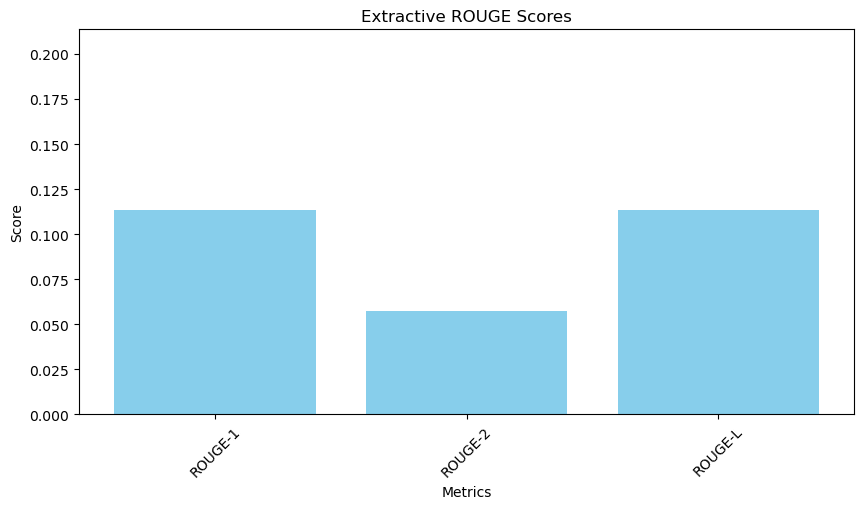

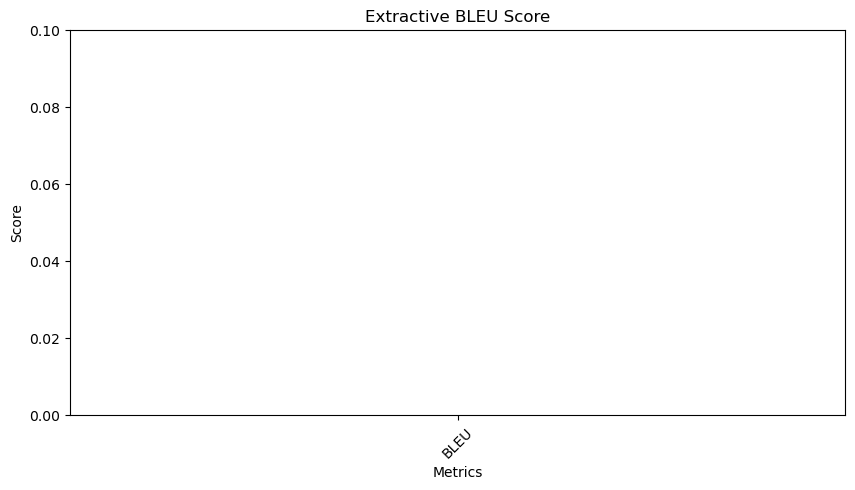

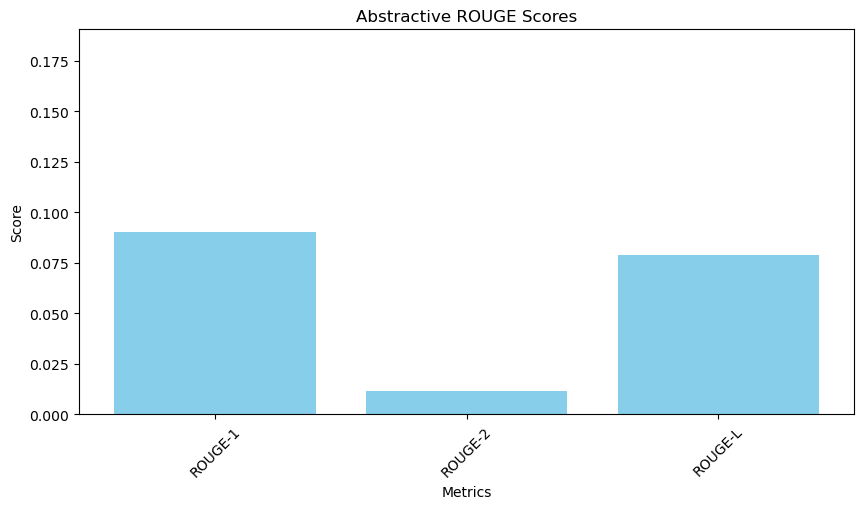

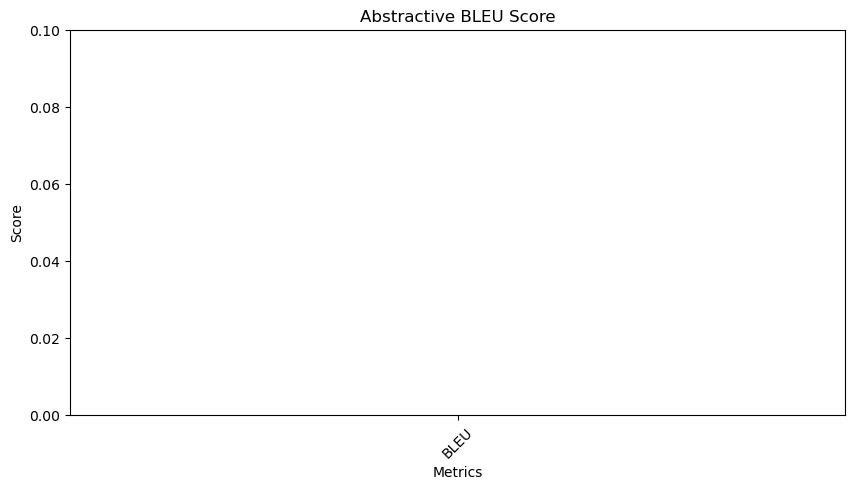

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Simpan hasil evaluasi dalam bentuk dictionary (tanpa .mid.fmeasure)
extractive_rouge_scores = {
    "ROUGE-1": rouge_score_extractive["rouge1"],
    "ROUGE-2": rouge_score_extractive["rouge2"],
    "ROUGE-L": rouge_score_extractive["rougeL"],
}

extractive_bleu_scores = {
    "BLEU": bleu_score_extractive["bleu"],
}

abstractive_rouge_scores = {
    "ROUGE-1": rouge_score_abstractive["rouge1"],
    "ROUGE-2": rouge_score_abstractive["rouge2"],
    "ROUGE-L": rouge_score_abstractive["rougeL"],
}

abstractive_bleu_scores = {
    "BLEU": bleu_score_abstractive["bleu"],
}

# Membuat DataFrame untuk tampilan tabel
df_extractive = pd.DataFrame({
    "Metric": list(extractive_rouge_scores.keys()) + list(extractive_bleu_scores.keys()),
    "Score": list(extractive_rouge_scores.values()) + list(extractive_bleu_scores.values())
})

df_abstractive = pd.DataFrame({
    "Metric": list(abstractive_rouge_scores.keys()) + list(abstractive_bleu_scores.keys()),
    "Score": list(abstractive_rouge_scores.values()) + list(abstractive_bleu_scores.values())
})

# Menampilkan hasil evaluasi dalam bentuk tabel
print("\nExtractive Summarization Scores:\n", df_extractive.to_string(index=False))
print("\nAbstractive Summarization Scores:\n", df_abstractive.to_string(index=False))

# Fungsi untuk membuat visualisasi bar chart
def plot_scores(scores, title):
    plt.figure(figsize=(10, 5))
    plt.bar(scores.keys(), scores.values(), color='skyblue')
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylim(0, max(scores.values()) + 0.1)
    plt.show()

# Visualisasi skor
plot_scores(extractive_rouge_scores, "Extractive ROUGE Scores")
plot_scores(extractive_bleu_scores, "Extractive BLEU Score")
plot_scores(abstractive_rouge_scores, "Abstractive ROUGE Scores")
plot_scores(abstractive_bleu_scores, "Abstractive BLEU Score")


#### ================================================================